## Componentes principales

'PCA' por sus sigles en ingles,  es una técnica de reducción de dimensionalidad que se utiliza para simplificar conjuntos de datos complejos con enesimas variables.

### Objetivo 
Reduce la dimencionalidad, permitiendo facilitar la visualzación de datos

### Conceptos Claves: 
- **Varianza**: Estadistico que mide la dispersión de los datos, indica cuanto se aleja los datos de su valor promedio.
        $$
        \sigma^2 = \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2
        $$
- **Covarianza**: Mide la relacion lineal entre dos variables, si ambas aumentas es covarianza positiva, si ambas disminuyen es covarianza negativa o si es cero no tiene relación lineal clara
- **Matriz de covarianza**: Es la matriz cuadrada  que describe la covarianza entre cada par de variables en un conjunto de datos.
- **Componentes principales**: Son las "nuevas variables" resultante del algoritmo, los primeros componentes principales son los que capturán la mayor varianza del conjunto de datos.
- **Autovalores**: Miden cuanta varianza capuura cada componente principal ("nuevas variables")
- **Autovectores**: Definen  la dirección de los componentes principales, define la "dirección"

### Variables requeridas 
Dado que se calcula varianzas  - covarianza - matriz de covarianza se requieren variables cuantitativas y estandarizados.

### Algoritmo 
1. **Estandarización de los datos**: Normalizar los datos para que cada variable tenga media "cero" y varianza "uno"
2. **Cálculo de la matriz de covarianza**: Evaluar la relación entre las variables del conjunto de datos.
3. **Obtención de autovalores y autovectores**: Descopone  la matriz de covarianza para encontrar  estos conceptos.
4. **Selección de Componentes principales**: Elegir los componentes principales que explican la mayor parte de la varianza (dependrá del investigador, estadisticamente podria ser al 10% de error [90%] o 5% de error [95%]) 
Se utiliza la regla del "codo" 
5. **Cuantificar la carga de cada variable de PCA**: Permite definir la contribución de cada variable original al nuevo componente principal, donde:

        - Cargas cercanas a 0: contribución mínima al componente principal correspondiente, puedes considerar eliminar o no darles mucha importancia si deseas simplificar la interpretación del componente.

        - Cargas cercanas a 0.6: contribución significativa al componente principal. Esto significa que estas variables tienen un fuerte impacto en la formación del componente y son importantes para entender la estructura de los datos en ese componente.

        - Cargas intermedias: Las cargas que se encuentran entre 0 y 0.6 indican una contribución moderada de la variable al componente principal. Estas variables son relevantes pero pueden no ser tan dominantes como las que tienen cargas más altas. La interpretación de estas cargas dependerá de tu objetivo de análisis y de cómo deseas utilizar los componentes principales.
        
5. **Definición de componentes**: Asignar que "concepto" mide cada componente nuevo.  

### Evaluación 
No posee "matriz de confunción" por que no predice, se puede evaluar mediante la cantidad de varianza explicada mediante los componentes principales



## Caso aplicado

In [13]:
# Importar librerias de python necesarias
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [54]:
# Declaro dataset
Wine = pd.DataFrame(load_wine().data,columns = load_wine().feature_names)

### Análisis exploratorio

1) **Reviso encabezados**
2) **Veo el tamaño del dataset**
3) **Reviso los atributos de cada variable**
4) **Describo estadisticamente las variables individuales**

In [26]:
# 1 
Wine.head() # Head retorna las priemras 5 filas del dataframe

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [27]:
# 2
print(f"El tamaño del dataset es {load_wine().data.shape}") 


El tamaño del dataset es (178, 13)


In [28]:
Wine.info() # Comando de pandas para proporcionar un resumen conciso del DataFrame. 
            # (Indices - Columnas - Valores nulos - Tipo de datos) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [29]:
Wine.describe() # Comando de pandas para proporcionar un resumen estadistico
                # (Cantiadad - media - mediana - std - min - max)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


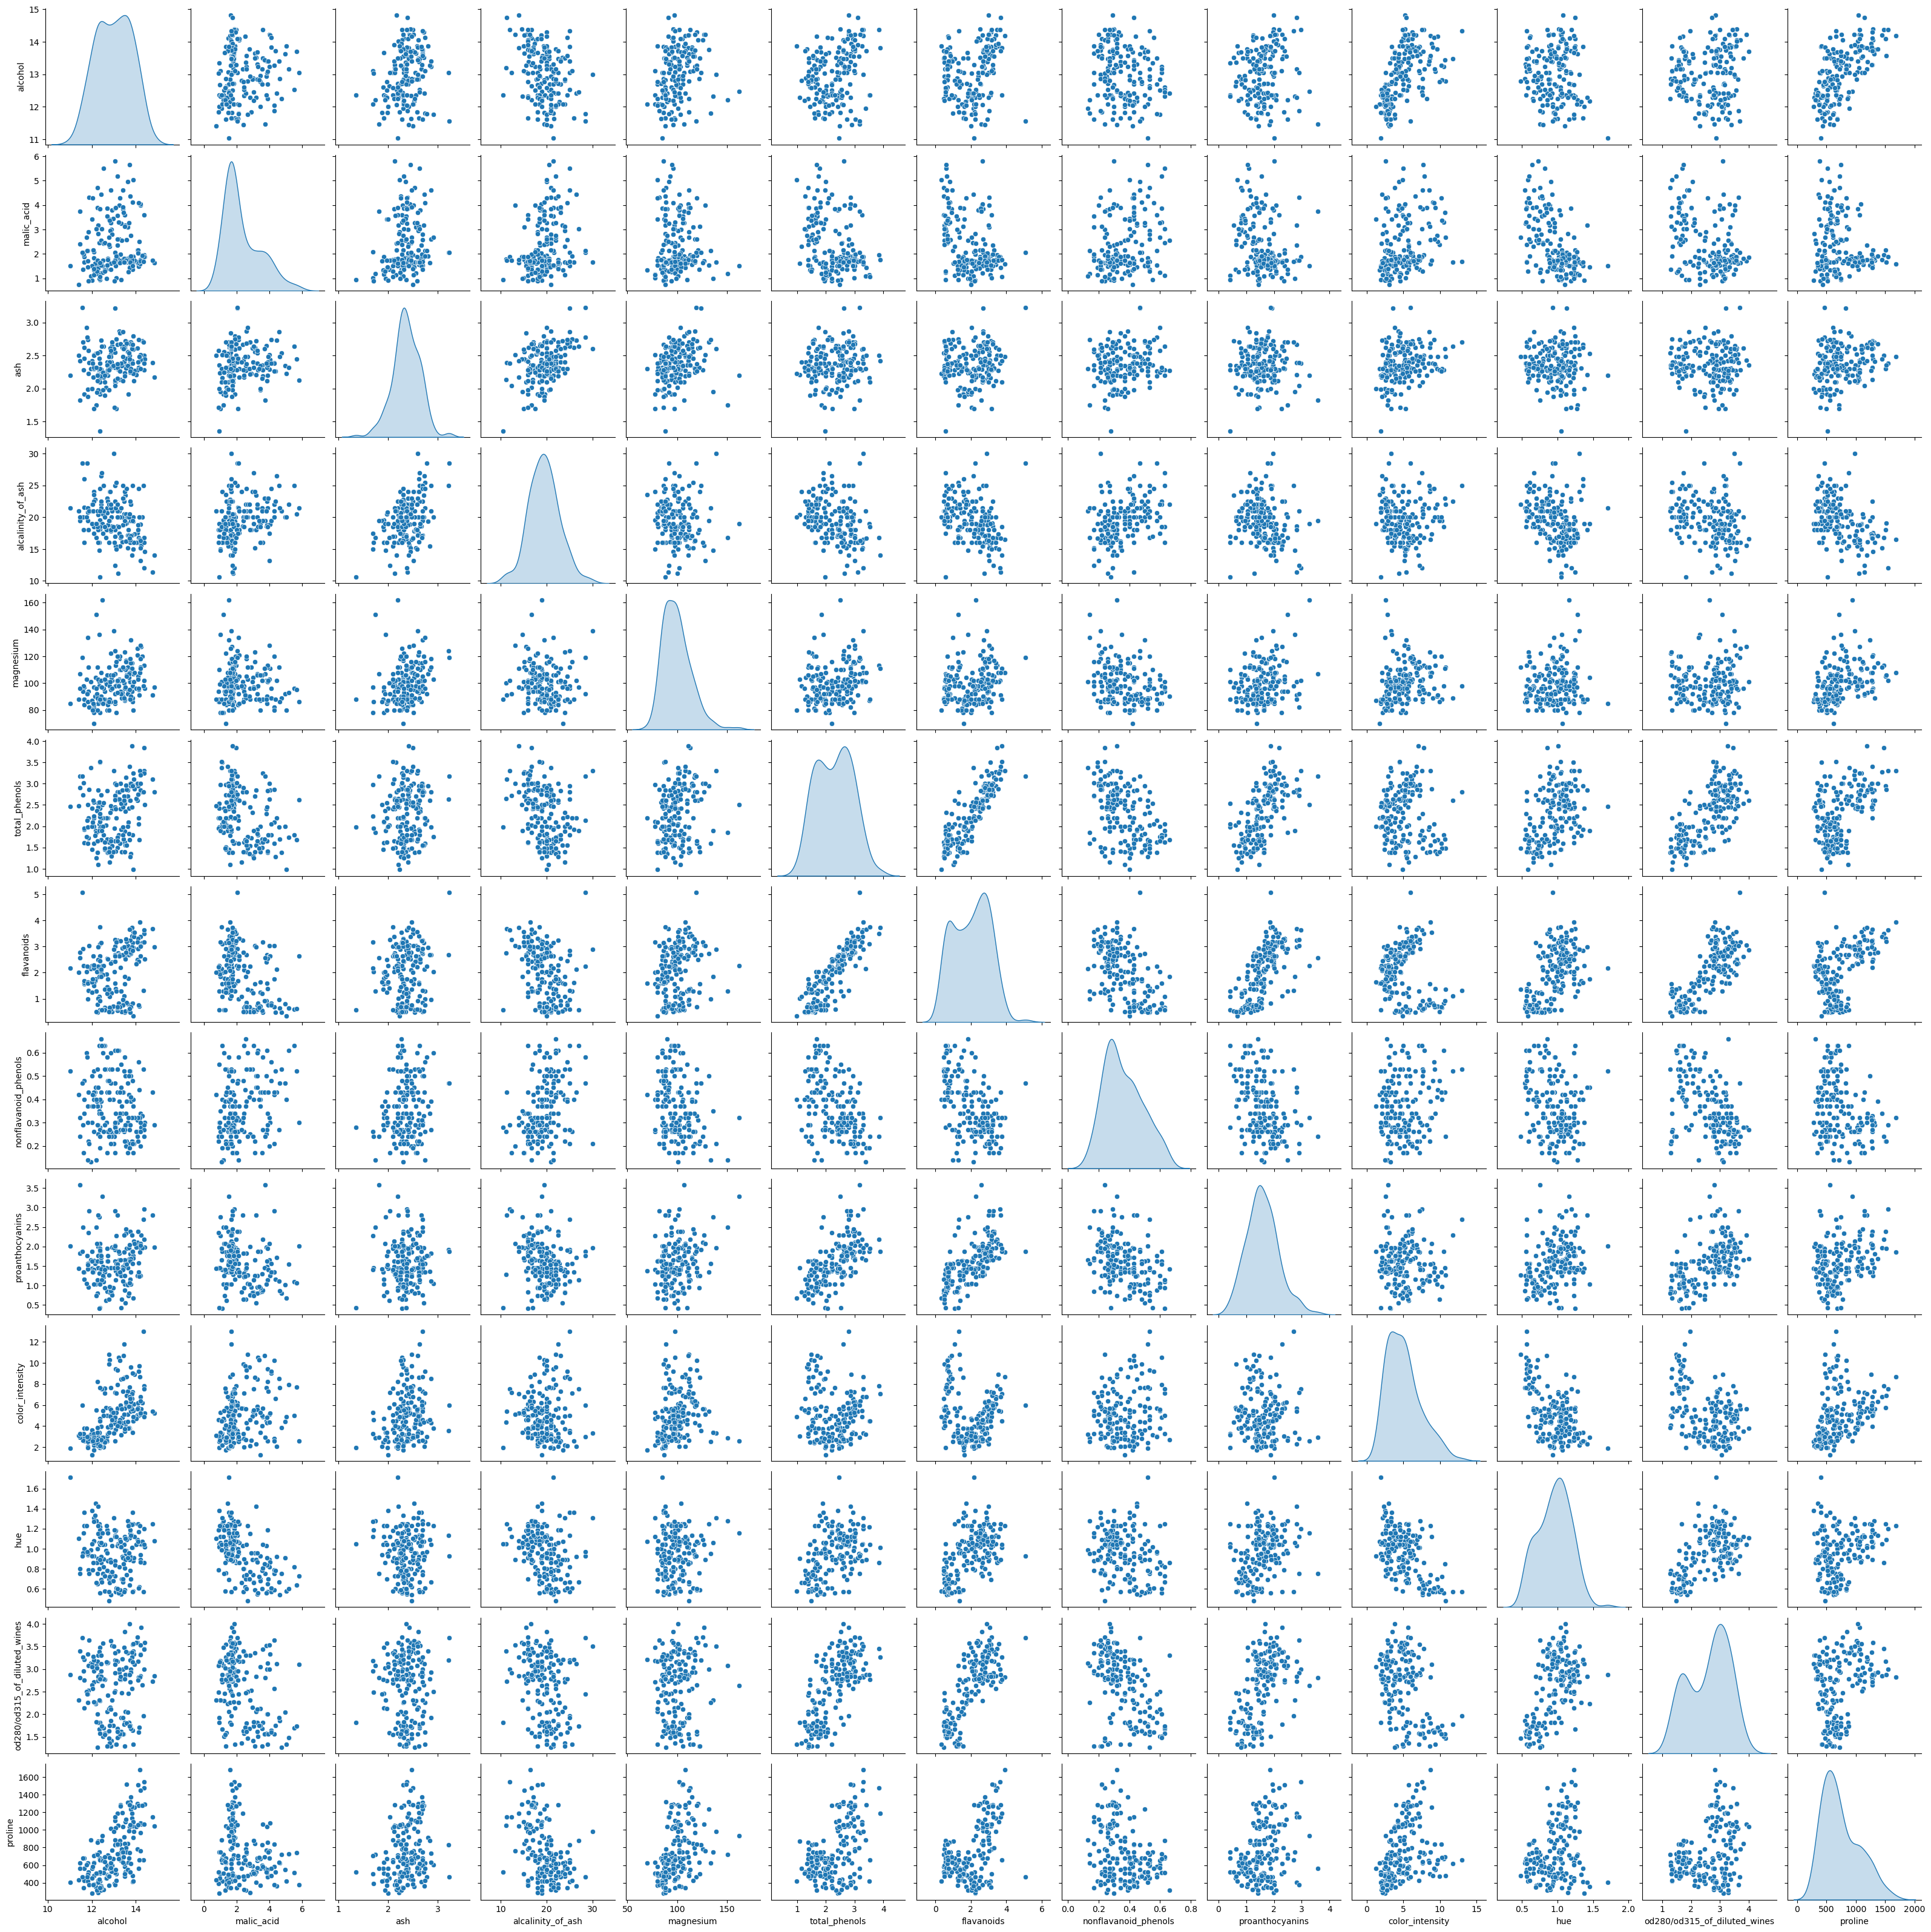

In [30]:
# Visualización de componentes principales en pares
sns.pairplot(Wine, diag_kind='kde')  # 'diag_kind' permite mostrar histogramas de densidad en la diagonal principal
plt.show()

### PCA 

In [73]:
# Paso 1: Normalizar
# Normalización de variables con media 0 y Varianza
X = StandardScaler(with_std=True, with_mean=True).fit_transform(Wine)

# Valido las medias cercanas a 0
Medias = X.mean(axis=0)
print(f"Medias después de la normalización:\n {Medias}")

# Valido las varianzas cercanas a 1
Var = X.var(axis=0)
print(f"Desviación despuesde la normalización:\n {Var}")


Medias después de la normalización:
 [ 7.84141790e-15  2.44498554e-16 -4.05917497e-15 -7.11041712e-17
 -2.49488320e-17 -1.95536471e-16  9.44313292e-16 -4.17892936e-16
 -1.54059038e-15 -4.12903170e-16  1.39838203e-15  2.12688793e-15
 -6.98567296e-17]
Desviación despuesde la normalización:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


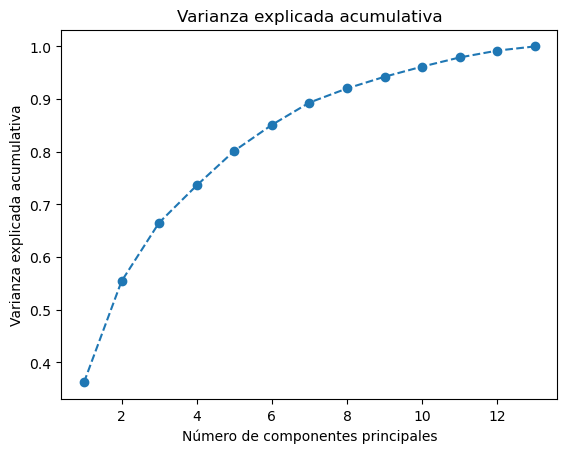

In [75]:
# Crear una instancia de PCA
pca = PCA()

# Aplicar PCA a tus datos estandarizados
# Internamente la función aplica el paso 2 y 3 
principal_components = pca.fit_transform(X)

# Explorar la varianza explicada por cada componente principal para determinar el paso 4
explained_variance_ratio = pca.explained_variance_ratio_

# Visualizar la varianza explicada acumulativa para decidir cuántos componentes conservar
import matplotlib.pyplot as plt

plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.title('Varianza explicada acumulativa')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulativa')
plt.show()



In [100]:
n_components = 4 # Defino la cantidad de componente en función de la regla del "codo" (paso 4)
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X)

# Datos reducidos a la cantidad de componentes principales que se definio previamente
pc_df=pd.DataFrame(principal_components, columns=[f'PC{i}' for i in range(1, n_components + 1)])

In [102]:
varianza_explicada = (pca.explained_variance_ratio_[0:3].sum())*100
print(f"La varianza explicada es: {varianza_explicada} %")

La varianza explicada es: 66.52996889318527 %


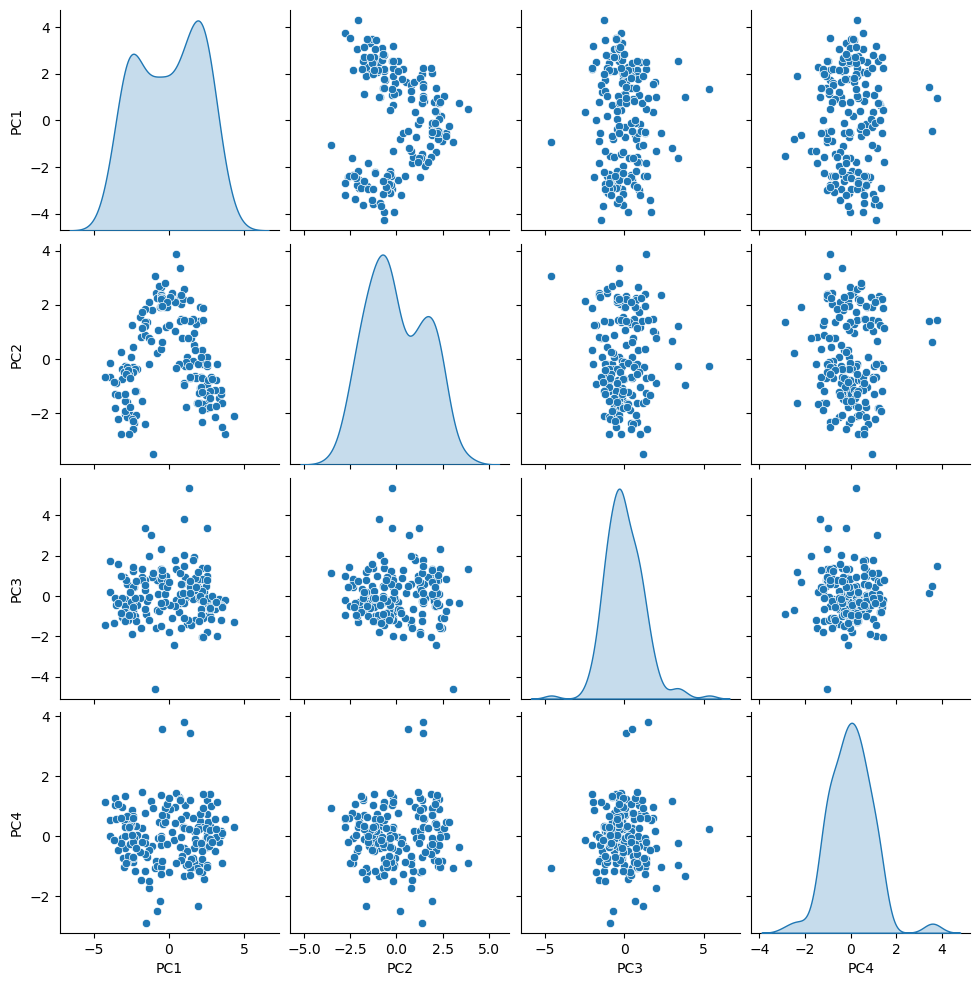

In [103]:
# Visualización de componentes principales en pares
sns.pairplot(pc_df, diag_kind='kde')  # 'diag_kind' permite mostrar histogramas de densidad en la diagonal principal
plt.show()

In [104]:
# Crear un DataFrame con las cargas de cada variable en cada componente principal
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(1, n_components + 1)], index=Wine.columns)

#Importancia de las variables
loadings_abs = loadings.abs()

# Mostrar las 5 variables con las cargas más altas para cada componente principal
top_loadings = loadings_abs.apply(lambda x: x.nlargest(5).index)

# Mostrar las cargas
print("Cargas de variables en cada componente principal:")
print(top_loadings)

Cargas de variables en cada componente principal:
                            PC1              PC2  \
0                    flavanoids  color_intensity   
1                 total_phenols          alcohol   
2  od280/od315_of_diluted_wines          proline   
3               proanthocyanins              ash   
4          nonflavanoid_phenols        magnesium   

                            PC3              PC4  
0                           ash       malic_acid  
1             alcalinity_of_ash              hue  
2                       alcohol  proanthocyanins  
3          nonflavanoid_phenols        magnesium  
4  od280/od315_of_diluted_wines          proline  


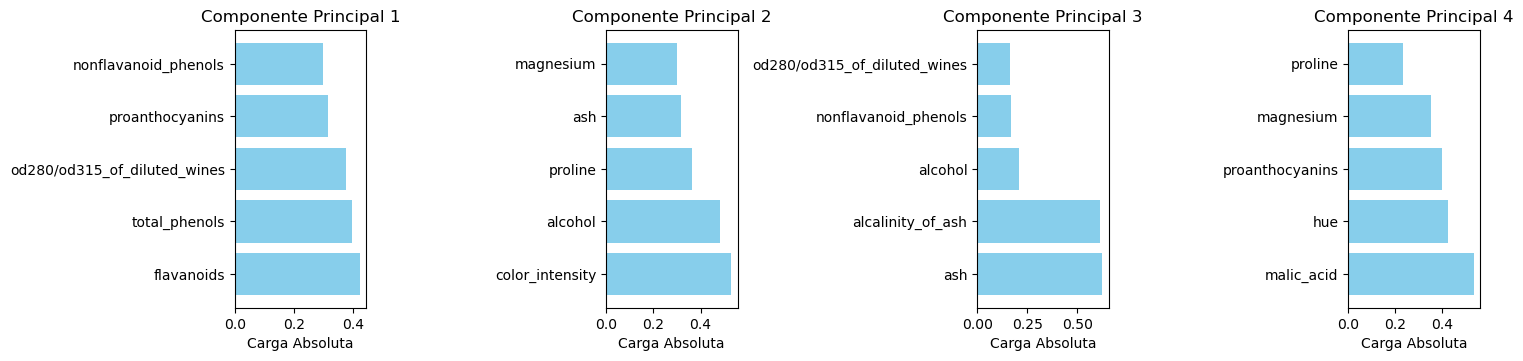

In [105]:
plt.figure(figsize=(15, 10))

for i in range(n_components):
    plt.subplot(3, 4, i + 1) #grafico de 3 filas y 3 columnas para visualizar cada componente
    top_vars = top_loadings[f'PC{i+1}'] #muestra los variables con mayor importancia para cada componente
    loading_values = loadings_abs[f'PC{i+1}'][top_vars]
    plt.barh(top_vars, loading_values, color='skyblue')
    plt.xlabel('Carga Absoluta')
    plt.title(f'Componente Principal {i+1}')

plt.tight_layout()
plt.show()

##### Nombre de componentes

Componente Principal 1 (PC1): "Características de Contorno y Dimensiones"

Componente Principal 2 (PC2): "Propiedades de Superficie y Textura"

Componente Principal 3 (PC3): "Errores de Medición y Simetría"

Componente Principal 4 (PC4): "Características de Composición y Suavidad"

Componente Principal 5 (PC5): "Errores de Textura y Simetría"

Componente Principal 6 (PC6): "Propiedades de Suavidad y Dimensión Fractal"

Componente Principal 7 (PC7): "Características de Dimensión Fractal y Puntos de Contorno"